### Load from analysis.db

In [2]:
from activity_tracker import utils
import sqlite3
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

data_dir = pathlib.Path("../data")
db_path = data_dir / "sqlite" / "analysis.db"
conn = sqlite3.connect(db_path)

In [ ]:
df_subject = pd.read_sql_query("SELECT * FROM subject", conn)
df_visit = pd.read_sql_query("SELECT * FROM visit", conn)
df_measurement = pd.read_sql_query("SELECT * FROM daily_measurement", conn)

# Convert date columns to datetime
df_measurement['date'] = pd.to_datetime(df_measurement['date'])
df_visit['date'] = pd.to_datetime(df_visit['date'])

# Pad subject_id for easier sorting
for df in [df_subject, df_visit, df_measurement]:
    if "subject_id" in df.columns:
        df["subject_id"] = df["subject_id"].str.replace(
            r"MDE(\d+)", 
            lambda m: f"MDE{int(m.group(1)):03d}", 
            regex=True
        )

# Filter measurements to only include days with measurements
start_col = df_measurement.columns.get_loc("percentage_wear_time") + 1
right_cols = df_measurement.columns[start_col:]
df_measurement = df_measurement[~df_measurement[right_cols].isna().all(axis=1)].reset_index(drop=True)
df_measurement.sort_values(by=["subject_id", "date"], inplace=True)
df_measurement

,subject_id,date,total_minutes_wear_time,percentage_wear_time,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,floors,calories_bmr,marginal_calories,resting_heart_rate,average_sp_o2,min_sp_o2,max_sp_o2
0,MDE001,2021-07-19,85,5.902778,147.0,0.1100,0.1100,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1489.0,None,1489.0,0.0,NaN,NaN,NaN,NaN
1,MDE001,2021-07-20,630,43.750000,12.0,0.0100,0.0100,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1473.0,None,1457.0,0.0,NaN,NaN,NaN,NaN
2,MDE001,2021-07-21,0,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1425.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
3,MDE001,2021-07-22,0,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1425.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
4,MDE001,2021-07-23,0,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1425.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,MDE101,2025-05-08,109,7.569444,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,4.0,1436.0,1160.0,None,1152.0,7.0,NaN,NaN,NaN,NaN
1644,MDE101,2025-05-09,717,49.791667,3920.0,2.6631,2.6631,0.0,0.0,0.2084,2.4547,0.0,0.0,0.0,204.0,1236.0,1487.0,None,1152.0,268.0,56.0,NaN,NaN,NaN
1645,MDE101,2025-05-10,165,11.458333,1160.0,0.7877,0.7877,0.0,0.0,0.0470,0.7407,0.0,0.0,0.0,64.0,1376.0,1259.0,None,1152.0,86.0,NaN,NaN,NaN,NaN
1646,MDE101,2025-05-11,0,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1152.0,None,1152.0,0.0,NaN,NaN,NaN,NaN


In [4]:
len(df_measurement["subject_id"].unique())

100

In [5]:
# Measure days per subject
measure_days_df = df_measurement.groupby('subject_id').size().reset_index(name='measured_days').sort_values(by='measured_days', ascending=False)
measure_days_df

,subject_id,measured_days
24,MDE025,299
72,MDE074,288
41,MDE042,246
40,MDE041,246
85,MDE087,242
93,MDE095,214
95,MDE097,213
87,MDE089,211
96,MDE098,211
42,MDE044,206


In [6]:
# Filter rows
start_col = df.columns.get_loc("percentage_wear_time") + 1
right_cols = df.columns[start_col:]

# Drop rows where all right-side values are NaN
filtered_df = df[~df[right_cols].isna().all(axis=1)].reset_index(drop=True)
filtered_df


,subject_id,date,total_minutes_wear_time,percentage_wear_time,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,floors,calories_bmr,marginal_calories,resting_heart_rate,average_sp_o2,min_sp_o2,max_sp_o2
0,MDE001,2021-07-19,85,5.902778,147.0,0.1100,0.1100,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1489.0,None,1489.0,0.0,NaN,NaN,NaN,NaN
1,MDE001,2021-07-20,630,43.750000,12.0,0.0100,0.0100,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1473.0,None,1457.0,0.0,NaN,NaN,NaN,NaN
2,MDE001,2021-07-21,0,0.000000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1425.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
3,MDE001,2021-07-22,0,0.000000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1425.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
4,MDE001,2021-07-23,0,0.000000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1425.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,MDE099,2024-10-19,13,0.902778,13.0,0.0000,0.0093,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,2.0,1438.0,1462.0,None,1456.0,5.0,NaN,NaN,NaN,NaN
14267,MDE099,2024-10-20,44,3.055556,478.0,0.3094,0.3446,0.0,0.1229,0.0,0.1865,0.0,0.0,0.0,20.0,1420.0,1503.0,None,1456.0,41.0,NaN,NaN,NaN,NaN
14268,MDE099,2024-10-21,5,0.347222,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1456.0,None,1456.0,0.0,NaN,NaN,NaN,NaN
14269,MDE099,2024-10-22,9,0.625000,34.0,0.0245,0.0245,0.0,0.0000,0.0,0.0245,0.0,0.0,0.0,3.0,1352.0,1377.0,None,1370.0,6.0,NaN,NaN,NaN,NaN


In [7]:
df_measurement.query('total_minutes_wear_time == 0 and total_distance != 0')

,subject_id,date,total_minutes_wear_time,percentage_wear_time,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,floors,calories_bmr,marginal_calories,resting_heart_rate,average_sp_o2,min_sp_o2,max_sp_o2
84,MDE001,2021-10-11,0,0.0,12.0,0.0100,0.0100,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1427.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
92,MDE001,2021-10-19,0,0.0,13.0,0.0100,0.0100,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1428.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
119,MDE001,2021-11-23,0,0.0,12.0,0.0100,0.0100,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1427.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
145,MDE001,2021-12-19,0,0.0,7.0,0.0100,0.0100,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1427.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
260,MDE002,2021-10-12,0,0.0,249.0,0.1700,0.1700,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1583.0,None,1583.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,MDE101,2025-04-22,0,0.0,10.0,0.0068,0.0068,0.0,0.0000,0.0000,0.0068,0.0,0.0,0.0,2.0,1438.0,1154.0,None,1152.0,1.0,NaN,NaN,NaN,NaN
1628,MDE101,2025-04-23,0,0.0,6.0,0.0040,0.0040,0.0,0.0000,0.0000,0.0040,0.0,0.0,0.0,1.0,1439.0,1153.0,None,1152.0,1.0,NaN,NaN,NaN,NaN
1629,MDE101,2025-04-24,0,0.0,2484.0,1.6885,1.6885,0.0,0.0736,0.3128,1.3021,0.0,0.0,0.0,123.0,1317.0,1365.0,None,1152.0,175.0,NaN,NaN,NaN,NaN
1630,MDE101,2025-04-25,0,0.0,4068.0,2.7631,2.7631,0.0,0.0000,0.1478,2.6153,0.0,0.0,0.0,217.0,1223.0,1482.0,None,1152.0,264.0,NaN,NaN,NaN,NaN


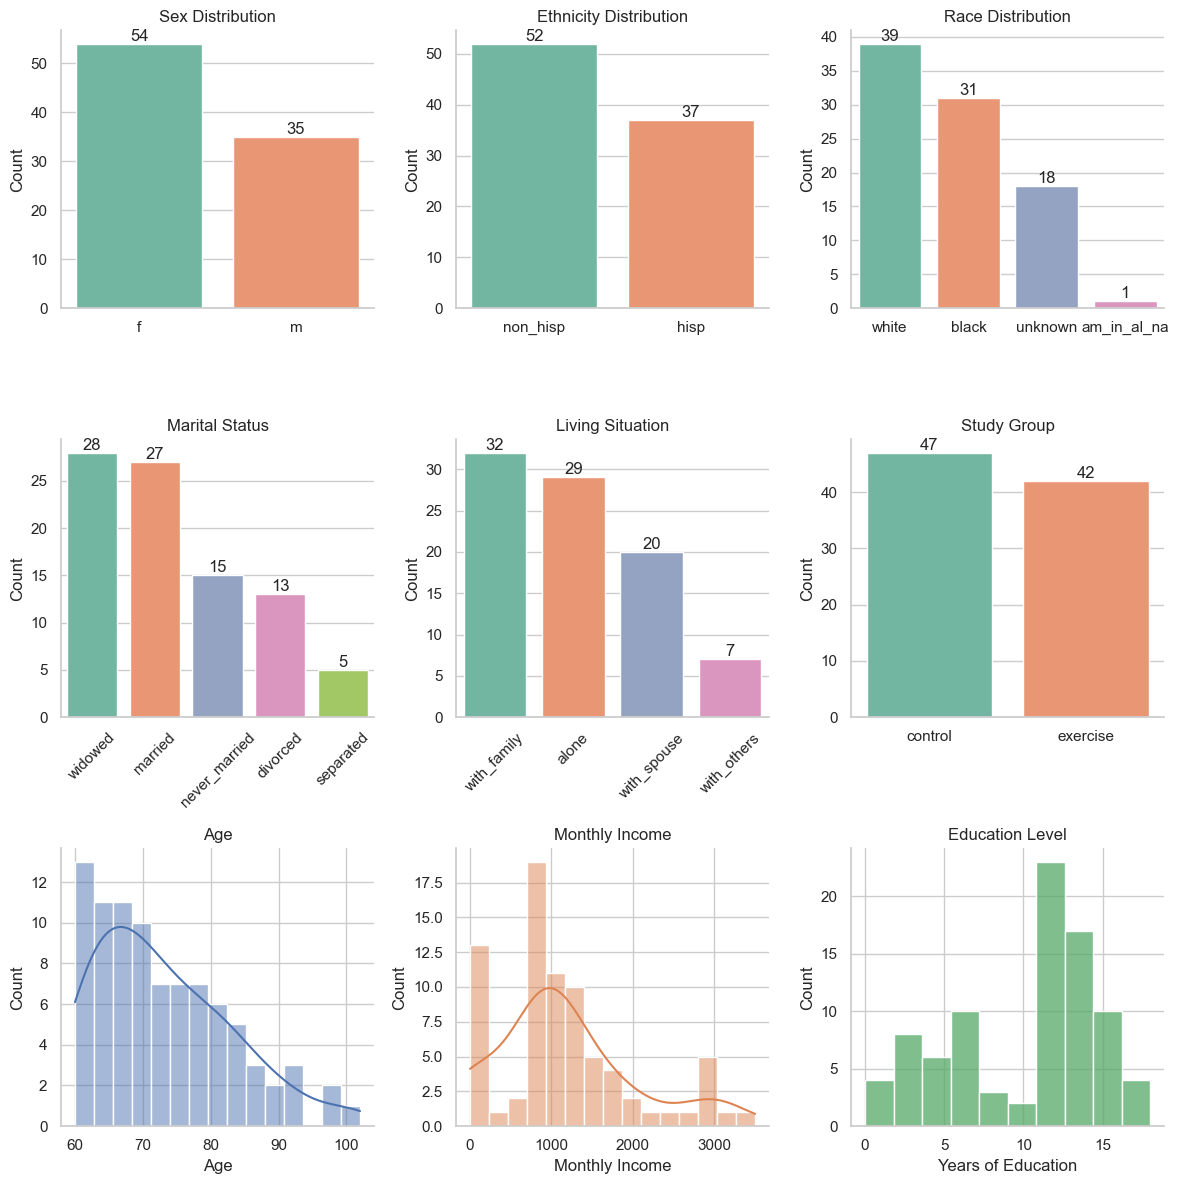

In [8]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(12, 12), dpi=100)
cat_vars = [
    ("sex", "Sex Distribution"),
    ("ethnicity", "Ethnicity Distribution"),
    ("race", "Race Distribution"),
    ("marital_status", "Marital Status"),
    ("living_situation", "Living Situation"),
    ("group", "Study Group"),
]

for idx, (col, title) in enumerate(cat_vars):
    ax = axes[idx // 3, idx % 3]
    counts = df_subject[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Set2")
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.set_xlabel("")
    if col in ["marital_status", "living_situation"]:
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.tick_params(axis='x', rotation=0)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    sns.despine(ax=ax)

sns.histplot(df_subject["age"].dropna(), bins=15, kde=True, ax=axes[2, 0], color="#4c72b0")
axes[2, 0].set_title("Age")
axes[2, 0].set_xlabel("Age")
sns.despine(ax=axes[2, 0])

sns.histplot(df_subject["monthly_income"].dropna(), bins=15, kde=True, ax=axes[2, 1], color="#dd8452")
axes[2, 1].set_title("Monthly Income")
axes[2, 1].set_xlabel("Monthly Income")
sns.despine(ax=axes[2, 1])

sns.histplot(df_subject["education"].dropna(), bins=10, kde=False, ax=axes[2, 2], color="#55a868")
axes[2, 2].set_title("Education Level")
axes[2, 2].set_xlabel("Years of Education")
sns.despine(ax=axes[2, 2])

plt.tight_layout()
plt.show()

In [12]:
df_visit

,subject_id,group,visit_id,ffp_status,ffp_score,date
0,MDE001,control,1,0,4.0,2021-07-19
1,MDE001,control,2,0,4.0,2021-08-23
2,MDE001,control,3,1,2.0,2021-09-15
3,MDE001,control,4,0,4.0,2021-10-07
4,MDE001,control,5,0,3.0,2022-01-19
...,...,...,...,...,...,...
440,MDE089,control,1,1,1.0,2023-11-01
441,MDE089,control,2,None,0.0,2023-12-29
442,MDE089,control,3,1,2.0,2024-01-25
443,MDE089,control,4,1,1.0,2024-02-29


In [13]:
plt.figure(figsize=(30, 25), dpi=300)
sns.scatterplot(
    data=df_measurement,
    x='date',
    y='subject_id',
    s=13,
    alpha=0.7,
    label='Measurement'
)
plt.xlabel('Date')
plt.ylabel('Subject ID')
plt.title('Measurement Days')

subjects = sorted(df_measurement['subject_id'].unique())
plt.ylim(subjects[-1], subjects[0])
plt.gca().set_ylim(plt.gca().get_ylim()[0] + 1, plt.gca().get_ylim()[1] - 1)

# Mark visit dates
plt.scatter(
    df_visit['date'],
    df_visit['subject_id'],
    color='red',
    marker='*',
    s=50,
    label='Visit Date'
)

plt.legend()
plt.tight_layout()
plt.show()

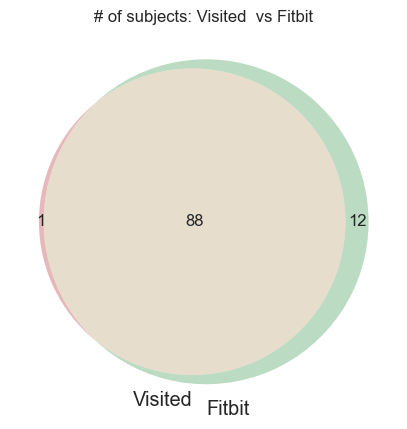

In [14]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

visited_subjects = set(df_visit["subject_id"].unique())
measured_subjects = set(df_measurement["subject_id"].unique())
both_subjects = visited_subjects & measured_subjects

# venn diagram
plt.figure(figsize=(5, 5))
venn2([visited_subjects, measured_subjects], set_labels=('Visited', 'Fitbit'))
plt.title('# of subjects: Visited  vs Fitbit')
plt.show()

In [15]:
len(df_measurement["subject_id"].unique()) # number of subjects with fitbit measurements
len(df_visit["subject_id"].unique()) # number of subjects with visits


print(f"Number of subjects with fitbit measurements: {len(df_measurement['subject_id'].unique())}")
print(f"Number of subjects with visits: {len(df_visit['subject_id'].unique())}")

Number of subjects with fitbit measurements: 100
Number of subjects with visits: 89


In [16]:
df_visit

,subject_id,group,visit_id,ffp_status,ffp_score,date
0,MDE001,control,1,0,4.0,2021-07-19
1,MDE001,control,2,0,4.0,2021-08-23
2,MDE001,control,3,1,2.0,2021-09-15
3,MDE001,control,4,0,4.0,2021-10-07
4,MDE001,control,5,0,3.0,2022-01-19
...,...,...,...,...,...,...
440,MDE089,control,1,1,1.0,2023-11-01
441,MDE089,control,2,None,0.0,2023-12-29
442,MDE089,control,3,1,2.0,2024-01-25
443,MDE089,control,4,1,1.0,2024-02-29


In [17]:
df_measurement

,subject_id,date,total_minutes_wear_time,percentage_wear_time,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,floors,calories_bmr,marginal_calories,resting_heart_rate,average_sp_o2,min_sp_o2,max_sp_o2
0,MDE001,2021-07-19,85,5.902778,147.0,0.1100,0.1100,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1489.0,None,1489.0,0.0,NaN,NaN,NaN,NaN
1,MDE001,2021-07-20,630,43.750000,12.0,0.0100,0.0100,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1473.0,None,1457.0,0.0,NaN,NaN,NaN,NaN
2,MDE001,2021-07-21,0,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1425.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
3,MDE001,2021-07-22,0,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1425.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
4,MDE001,2021-07-23,0,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1425.0,None,1425.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,MDE101,2025-05-08,109,7.569444,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,4.0,1436.0,1160.0,None,1152.0,7.0,NaN,NaN,NaN,NaN
1644,MDE101,2025-05-09,717,49.791667,3920.0,2.6631,2.6631,0.0,0.0,0.2084,2.4547,0.0,0.0,0.0,204.0,1236.0,1487.0,None,1152.0,268.0,56.0,NaN,NaN,NaN
1645,MDE101,2025-05-10,165,11.458333,1160.0,0.7877,0.7877,0.0,0.0,0.0470,0.7407,0.0,0.0,0.0,64.0,1376.0,1259.0,None,1152.0,86.0,NaN,NaN,NaN,NaN
1646,MDE101,2025-05-11,0,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1440.0,1152.0,None,1152.0,0.0,NaN,NaN,NaN,NaN


In [18]:
df_subject_measured = df_subject[df_subject["subject_id"].isin(df_measurement["subject_id"].unique())].reset_index(drop=True).sort_values(by="subject_id")
df_subject_measured

,subject_id,group,sex,age,ethnicity,race,monthly_income,education,marital_status,living_situation
0,MDE001,control,m,83.0,non_hisp,black,3000.0,18.0,never_married,with_others
1,MDE002,exercise,m,61.0,non_hisp,white,1033.0,3.0,never_married,alone
2,MDE003,exercise,f,69.0,hisp,white,1349.0,13.0,widowed,with_family
3,MDE004,control,f,65.0,non_hisp,black,900.0,11.0,widowed,with_family
4,MDE005,control,f,84.0,non_hisp,black,792.0,3.0,widowed,with_family
5,MDE006,control,m,65.0,non_hisp,white,814.0,12.0,divorced,alone
6,MDE007,exercise,f,76.0,non_hisp,black,1004.0,7.0,widowed,alone
7,MDE008,control,f,87.0,non_hisp,black,1300.0,15.0,widowed,with_family
8,MDE009,control,m,64.0,non_hisp,black,2700.0,12.0,widowed,alone
9,MDE010,exercise,m,66.0,non_hisp,black,1260.0,12.0,married,with_spouse


In [19]:
# Number of subject with visits and measurements
len(df_subject_measured)

# Number of subjects with visits but no measurements
len(df_visit["subject_id"].unique()) - len(df_subject_measured)

# Number of subjects with measurements but no visits
len(df_measurement["subject_id"].unique()) - len(df_subject_measured)

12

In [20]:
df_subject_filtered = df_subject[df_subject["subject_id"].isin(both_subjects)]
df_visit_filtered = df_visit[df_visit["subject_id"].isin(both_subjects)]
df_measurement_filtered = df_measurement[df_measurement["subject_id"].isin(both_subjects)]

In [24]:
df_visit

,subject_id,group,visit_id,ffp_status,ffp_score,date
0,MDE001,control,1,0,4.0,2021-07-19
1,MDE001,control,2,0,4.0,2021-08-23
2,MDE001,control,3,1,2.0,2021-09-15
3,MDE001,control,4,0,4.0,2021-10-07
4,MDE001,control,5,0,3.0,2022-01-19
...,...,...,...,...,...,...
440,MDE089,control,1,1,1.0,2023-11-01
441,MDE089,control,2,None,0.0,2023-12-29
442,MDE089,control,3,1,2.0,2024-01-25
443,MDE089,control,4,1,1.0,2024-02-29


{0: 'frail', 1: 'prefrail', 2: 'robust'}

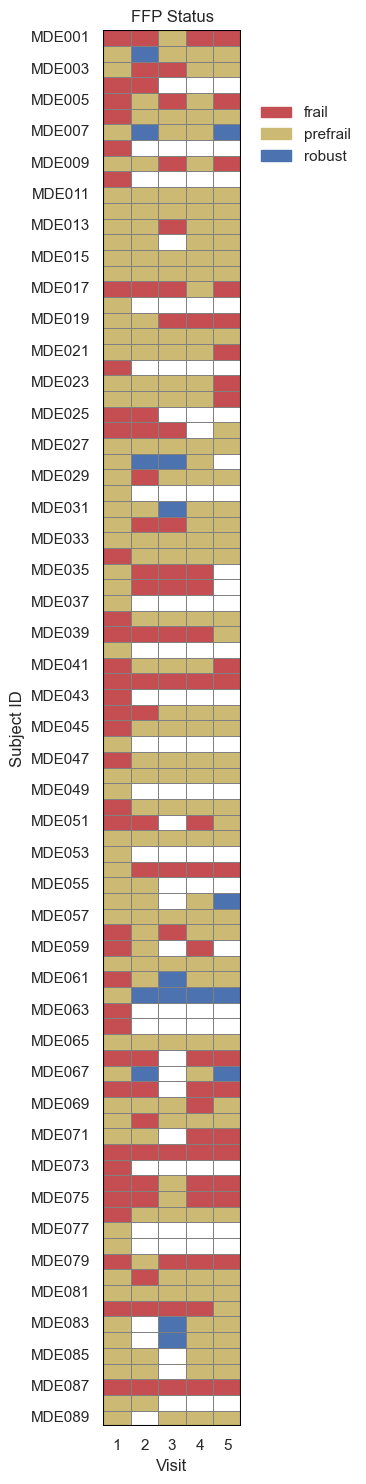

In [73]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as patches

from activity_tracker import utils

# Load mapping and set up colors/labels
mapping_dict = utils.load_data_mapper("../data/data_mapper.yml")
ffp_labels = mapping_dict['ffp_status']
colors = ['r', 'y', 'b']  # frail, prefrail, robust
cmap = ListedColormap(colors)
cmap.set_bad('white')  
bounds = [-0.5, 0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)

df_heat = df_visit.copy()
df_heat = df_heat.dropna(subset=["visit_id"])
df_heat['ffp_status'] = pd.to_numeric(df_heat['ffp_status'], errors='coerce')

heat_matrix = df_heat.pivot(index='subject_id', columns='visit_id', values='ffp_status')

# Ensure columns are sorted by visit number
heat_matrix = heat_matrix.reindex(sorted(heat_matrix.columns), axis=1)

# Plot
plt.figure(figsize=(4, 15))
ax = sns.heatmap(
    heat_matrix,
    cmap=cmap,
    norm=norm,
    linewidths=0.5,
    linecolor='gray',
    cbar=False,
    square=False,
    mask=heat_matrix.isna()
)

# Add a rectangle boundary around the heatmap
ax.add_patch(
    patches.Rectangle(
        (0, 0),
        heat_matrix.shape[1],
        heat_matrix.shape[0],
        fill=False,
        edgecolor='black',
        lw=1.5
    )
)

# Custom legend with dots
legend_labels = [mpatches.Patch(color=colors[i], label=ffp_labels[i]) for i in range(3)]
plt.legend(
    handles=legend_labels,
    bbox_to_anchor=(1.1, 0.95),
    loc='upper left',
    borderaxespad=0.,
    frameon=False
)

plt.title('FFP Status')
plt.xlabel('Visit')
plt.ylabel('Subject ID')
plt.tight_layout()
plt.show()